# 第6章 逻辑斯谛回归与最大熵模型

## 习题6.1

&emsp;&emsp;确认逻辑斯谛分布属于指数分布族。

**解答：**

**解答思路：**  

1. 列出逻辑斯谛分布的定义
2. 列出指数分布族的定义
3. 通过指数倾斜，证明逻辑斯谛分布的分布函数无法表示成指数分布族的分布函数形式

**解答步骤：**

**第1步：逻辑斯谛分布的定义**

&emsp;&emsp;根据书中第6章的逻辑斯谛分布的定义：

> **定义6.1（逻辑斯谛分布）** 设$X$是连续随机变量，$X$服从逻辑斯谛分布是指$X$具有下列分布函数和密度函数：
> 
> $$ F(x) = P(X \leqslant x) = \frac{1}{1 + \text{e}^{-(x-\mu)/\gamma}} \\
f(x) = F'(x) = \frac{\text{e}^{-(x-\mu)/\gamma}}{\gamma(1+ \text{e}^{-(x-\mu)/\gamma})^2} $$
> 
> 式中，$\mu$为位置参数，$\gamma > 0$为形状参数。

**第2步：指数分布族的定义**

> 参考指数分布族的Wikipedia：https://en.wikipedia.org/wiki/Exponential_family  
> 对于随机变量$x$，在给定参数$\theta$下，其概率分别满足如下形式：
> 
> $$ f(x|\theta)=h(x)g(\theta)\exp(\eta(\theta)\cdot T(x)) $$
> 
> 称之为指数分布族。  
> 其中：$g(\theta)$表示归一化系数，$h(x)>0$ 

**注：**这里我们将通过替换$\eta(\theta)$来构造反例分布

**第3步：证明逻辑斯谛分布的分布函数无法表示成指数分布族的分布函数形式**

&emsp;&emsp;根据指数分布族的Wikipedia：https://en.wikipedia.org/wiki/Exponential_family
> Other examples of distributions that are not exponential families are the F-distribution, Cauchy distribution, hypergeometric distribution and logistic distribution

&emsp;&emsp;可知，逻辑斯谛分布不属于指数分布族

证明思路：   
参考：https://stats.stackexchange.com/questions/275773/does-logistic-distribution-belongs-to-exponential-family 

1. 设$\gamma=1$，可得单参数的逻辑斯谛分布；
2. 计算当$\mu=0$时，函数$f(x|\mu=0)$；
3. 根据逻辑斯谛分布的MGF（矩生成函数），可得$E(\text{e}^{\theta x})$；
4. 根据指数倾斜的定义，证明单参数$\theta$的指数倾斜密度函数无法表示成逻辑斯谛分布的密度函数形式；可证得，逻辑斯谛分布不属于指数分布族；

证明步骤：

1. 单参数逻辑斯谛分布：  
设$\gamma=1$，则单参数$\mu$的逻辑斯谛分布：
$$
f(x|\mu) = \frac{\text{e}^{-(x-\mu)}}{(1+ \text{e}^{-(x-\mu)})^2}
$$

2. 计算$f(x|\mu=0)$  
$$f(x|\mu=0) = \frac{\text{e}^{-x}}{(1+ \text{e}^{-x})^2}$$

3. 逻辑斯谛分布的MGF矩生成函数

根据逻辑斯谛分布的Wikipedia：https://en.wikipedia.org/wiki/Logistic_distribution
>  Logistic的MGF矩生成函数$M_X(\theta)$：
> $$ M_X(\theta) = \text{e}^{\mu t}B(1-st, 1+st) $$ 
> 
> 其中$t \in (-1/s, 1/s)$，$B$表示Beta函数。

可知，当$\mu=0, s=1$时，
$$
M_X(\theta) = E(\text{e}^{\theta x}) = B(1-\theta, 1+\theta), \quad \theta \in (-1, 1)
$$

4. 证明单参数$\theta$的指数倾斜密度函数无法表示成逻辑斯谛分布的形式

根据指数倾斜的Wikipedia：https://en.wikipedia.org/wiki/Exponential_tilting 
> &emsp;&emsp;给定一个随机变量$X$，其概率分布为$P$，概率密度为$f$和矩生成函数(MGF)为$M_X(\theta) = E(e^{\theta x})$，指数倾斜$P_{\theta}$定义如下：
> 
> $$ P_{\theta}(X \in dx) = \frac{E[\text{e}^{\theta X} I(X \in dx)]}{ M_X(\theta)} = \text{e}^{\theta x - k(\theta)}P(X \in dx) $$
> 
> &emsp;&emsp;其中，$k(\theta)$表示为累积生成函数（CGF），即$\log E(\text{e}^{\theta X})$，称$P_{\theta}(X \in dx)=f_{\theta}(x)$为随机变量$X$的$\theta$-tilted密度分布。

&emsp;&emsp;综上，我们将使用$M_X(\theta)$替换$\eta(\theta)$，可知
$$
f_{\theta}(x)=\text{e}^{\theta x - k(\theta)} f_0(x)
$$

&emsp;&emsp;其中，$k(\theta)= \log M_X(\theta) = B(1-\theta, 1+\theta), \quad \theta \in (-1, 1)$，根据指数倾斜性质，$f_{\theta}(x)$无法表示逻辑斯谛分布的密度函数形式。  
&emsp;&emsp;所以，逻辑斯谛分布不属于指数分布族。

## 习题6.2

&emsp;&emsp;写出逻辑斯谛回归模型学习的梯度下降算法。

**解答：**

**解答思路：**
1. 写出逻辑斯谛回归模型
2. 根据书中附录A梯度下降法，写出逻辑斯谛回归模型学习的梯度下降法
3. 自编程实现逻辑斯谛回归模型学习的梯度下降法

**解答步骤：**

**第1步：逻辑斯谛回归模型**  

&emsp;&emsp;根据书中第6章逻辑斯谛回归模型的定义：

> **定义6.2（逻辑斯谛回归模型）** 二项逻辑斯谛回归模型是如下的条件概率分别：
> $$ P(Y=1 | x)=\frac{\exp (w \cdot x+b)}{1+\exp (w \cdot x+b)} \\ 
P(Y=0 | x)=\frac{1}{1+\exp (w \cdot x+b)} $$
> 
> 这里，$x \in R^n$是输入，$Y \in \{0, 1 \}$是输出，$w \in R^n$和$b \in R^n$是参数，$w$称为权值向量，$b$称为偏置，$w \cdot x$为$w$和$x$的内积。

**第2步：逻辑斯谛回归模型学习的梯度下降法**

&emsp;&emsp;根据书中第6.1.3节的模型参数估计：
> 逻辑斯谛回归模型的对数似然函数为
> $$ L(w)=\sum_{i=1}^N \left[y_i (w \cdot x_i)-\log (1+\exp (w \cdot x_i))\right] $$

&emsp;&emsp;将对数似然函数求偏导，可得
$$
\frac{\partial L(w)}{\partial w^{(k)}}=\sum_{i=1}^N\left[x_i \cdot y_i-\frac{\exp (w^{(k)} \cdot x_i) \cdot x_i}{1+\exp (w^{(k)} \cdot x_i)}\right]
$$  
&emsp;&emsp;梯度函数为
$$
\nabla L(w)=\left[\frac{\partial L(w)}{\partial w^{(0)}}, \cdots, \frac{\partial L(w)}{\partial w^{(n)}}\right]
$$

&emsp;&emsp;根据书中附录A 梯度下降法的算法：

> **算法A.1（梯度下降法）**  
> 输入：目标函数$f(x)$，梯度函数$g(x)= \nabla f(x)$，计算精度$\varepsilon$；  
输出：$f(x)$的极小值$x^*$。  
（1）取初始值$x^{(0)} \in R^n$，置$k=0$。  
（2）计算$f(x^{(k)})$。  
（3）计算梯度$g_k=g(x^{(k)})$，当$\|g_k\| < \varepsilon$时，停止迭代，令$x^* = x^{(k)}$；否则，令$p_k=-g(x^{(k)})$，求$\lambda_k$，使
> 
> $$ \displaystyle f(x^{(k)}+\lambda_k p_k) = \min \limits_{\lambda \geqslant 0}f(x^{(k)}+\lambda p_k) $$
> （4）置$x^{(k+1)}=x^{(k)}+\lambda_k p_k$，计算$f(x^{(k+1)})$。当$\|f(x^{(k+1)}) - f(x^{(k)})\| < \varepsilon$或 $\|x^{(k+1)} - x^{(k)}\| < \varepsilon$时，停止迭代，令$x^* = x^{(k+1)}$。  
（5）否则，置$k=k+1$，转步骤（3）。

逻辑斯谛回归模型学习的梯度下降算法：  
输入：目标函数$f(w)$，梯度函数$g(w) = \nabla f(w)$，计算精度$\varepsilon$  
输出：$f(w)$的极大值$w^*$  
（1）取初始值$w^{(0)} \in R^n$，置$k=0$。  
（2）计算$\displaystyle f(w^{(k)})=\sum_{i=1}^N \left[y_i (w^{(k)} \cdot x_i)-\log (1+\exp (w^{(k)} \cdot x_i))\right]$  
（3）计算梯度$\displaystyle g_k=g(w^{(k)})=\sum_{i=1}^N\left[x_i \cdot y_i-\frac{\exp (w^{(k)} \cdot x_i) \cdot x_i}{1+\exp (w^{(k)} \cdot x_i)}\right]$，当$\|g_k\| < \varepsilon$时，停止迭代，令$w^* = w^{(k)}$；否则，令$p_k=-g(w^{(k)})$，求$\lambda_k$，使

$$
\displaystyle f(w^{(k)}+\lambda_k p_k) = \max_{\lambda \geqslant 0}f(w^{(k)}+\lambda p_k)
$$  
（4）置$w^{(k+1)}=w^{(k)}+\lambda_k p_k$，计算$f(w^{(k+1)})$。当$\|f(w^{(k+1)}) - f(w^{(k)})\| < \varepsilon$或 $\|w^{(k+1)} - w^{(k)}\| < \varepsilon$时，停止迭代，令$w^* = w^{(k+1)}$。  
（5）否则，置$k=k+1$，转步骤（3）。

**第3步：自编程实现逻辑斯谛回归模型学习的梯度下降法**

In [1]:
from scipy.optimize import fminbound
from pylab import mpl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 图像显示中文
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']


class MyLogisticRegression:
    def __init__(self, max_iter=10000, distance=3, epsilon=1e-6):
        """
        逻辑斯谛回归
        :param max_iter: 最大迭代次数 
        :param distance: 一维搜索的长度范围
        :param epsilon: 迭代停止阈值
        """
        self.max_iter = max_iter
        self.epsilon = epsilon
        # 权重
        self.w = None
        self.distance = distance
        self._X = None
        self._y = None

    @staticmethod
    def preprocessing(X):
        """将原始X末尾加上一列，该列数值全部为1"""
        row = X.shape[0]
        y = np.ones(row).reshape(row, 1)
        return np.hstack((X, y))

    @staticmethod
    def sigmod(x):
        return 1 / (1 + np.exp(-x))

    def grad(self, w):
        z = np.dot(self._X, w.T)
        grad = self._X * (self._y - self.sigmod(z))
        grad = grad.sum(axis=0)
        return grad

    def like_func(self, w):
        z = np.dot(self._X, w.T)
        f = self._y * z - np.log(1 + np.exp(z))
        return np.sum(f)

    def fit(self, data_x, data_y):
        self._X = self.preprocessing(data_x)
        self._y = data_y.T
        # （1）取初始化w
        w = np.array([[0] * self._X.shape[1]], dtype=float)
        k = 0
        # （2）计算f(w)
        fw = self.like_func(w)
        for _ in range(self.max_iter):
            # 计算梯度g(w)
            grad = self.grad(w)
            # （3）当梯度g(w)的模长小于精度时，停止迭代
            if (np.linalg.norm(grad, axis=0, keepdims=True) < self.epsilon).all():
                self.w = w
                break

            # 梯度方向的一维函数
            def f(x):
                z = w - np.dot(x, grad)
                return -self.like_func(z)

            # （3）进行一维搜索，找到使得函数最大的lambda
            _lambda = fminbound(f, -self.distance, self.distance)

            # （4）设置w(k+1)
            w1 = w - np.dot(_lambda, grad)
            fw1 = self.like_func(w1)

            # （4）当f(w(k+1))-f(w(k))的二范数小于精度，或w(k+1)-w(k)的二范数小于精度
            if np.linalg.norm(fw1 - fw) < self.epsilon or \
                    (np.linalg.norm((w1 - w), axis=0, keepdims=True) < self.epsilon).all():
                self.w = w1
                break

            # （5） 设置k=k+1
            k += 1
            w, fw = w1, fw1

        self.grad_ = grad
        self.n_iter_ = k
        self.coef_ = self.w[0][:-1]
        self.intercept_ = self.w[0][-1]

    def predict(self, x):
        p = self.sigmod(np.dot(self.preprocessing(x), self.w.T))
        p[np.where(p > 0.5)] = 1
        p[np.where(p < 0.5)] = 0
        return p

    def score(self, X, y):
        y_c = self.predict(X)
        # 计算准确率
        error_rate = np.sum(np.abs(y_c - y.T)) / y_c.shape[0]
        return 1 - error_rate

    def draw(self, X, y):
        # 分隔正负实例点
        y = y[0]
        X_po = X[np.where(y == 1)]
        X_ne = X[np.where(y == 0)]
        # 绘制数据集散点图
        ax = plt.axes(projection='3d')
        x_1 = X_po[0, :]
        y_1 = X_po[1, :]
        z_1 = X_po[2, :]
        x_2 = X_ne[0, :]
        y_2 = X_ne[1, :]
        z_2 = X_ne[2, :]
        ax.scatter(x_1, y_1, z_1, c="r", label="正实例")
        ax.scatter(x_2, y_2, z_2, c="b", label="负实例")
        ax.legend(loc='best')
        # 绘制透明度为0.5的分隔超平面
        x = np.linspace(-3, 3, 3)
        y = np.linspace(-3, 3, 3)
        x_3, y_3 = np.meshgrid(x, y)
        a, b, c, d = self.w[0]
        z_3 = -(a * x_3 + b * y_3 + d) / c
        # 调节透明度
        ax.plot_surface(x_3, y_3, z_3, alpha=0.5)
        plt.show()

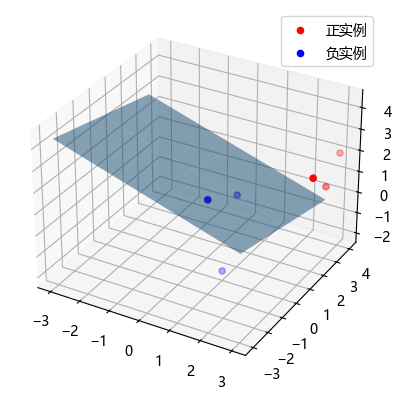

迭代次数：2095次
梯度：[ 7.33881397e-05  2.44073067e-05  2.52604176e-04 -5.13424350e-04]
权重：[  4.34496173   2.05340452   9.64074166 -22.85079478]
模型准确率：100.00%


In [2]:
# 训练数据集
X_train = np.array([[3, 3, 3], [4, 3, 2], [2, 1, 2], [1, 1, 1], [-1, 0, 1], [2, -2, 1]])
y_train = np.array([[1, 1, 1, 0, 0, 0]])
# 构建实例，进行训练
clf = MyLogisticRegression(epsilon=1e-6)
clf.fit(X_train, y_train)
clf.draw(X_train, y_train)
print("迭代次数：{}次".format(clf.n_iter_))
print("梯度：{}".format(clf.grad_))
print("权重：{}".format(clf.w[0]))
print("模型准确率：%0.2f%%" % (clf.score(X_train, y_train) * 100))

## 习题6.3

&emsp;&emsp;写出最大熵模型学习的DFP算法。（关于一般的DFP算法参见附录B）

**解答：**

**解答思路：**
1. 写出最大熵模型
2. 根据附录B的DFP算法，写出最大熵模型学习的DFP算法
3. 自编程实现最大熵模型学习的DFP算法

**解答步骤：**

**第1步：最大熵模型**

&emsp;&emsp;根据书中第6.6.2节的最大熵模型的定义：

> **定义6.3（最大熵模型）** 假设满足所有约束条件的模型集合为
> $$ \mathcal{C} = \{P \in \mathcal{P} | E_P(f_i) = E_{\tilde{P}}(f_i), \quad i=1,2,\cdots,n \} $$
> 定义在条件概率分布$P(Y|X)$上的条件熵为
> $$ H(P) = -\sum \limits_{x,y} \tilde{P}(x) P(y|x) \log P(y|x) $$
> 则模型集合$\mathcal{C}$中条件熵$H(P)$最大的模型称为最大熵模型。式中的对数为自然对数。

&emsp;&emsp;根据书中第6.2.2节的最大熵模型的特征函数：

> 用特征函数$f(x,y)$描述输入$x$与输出$y$之间的某一个事实。其定义是
> $$ f(x, y) = \left \{ \begin{array}{ll}
1, \quad x与y满足某一事实 \\
0, \quad 否则
\end{array} \right. $$
它是一个二值函数，当$x$和$y$满足这个事实时取值为1，否则取值为0。

**第2步：最大熵模型学习的DFP算法**

&emsp;&emsp;根据书中第6.3.2节拟牛顿法的最大熵模型学习：
> 对于最大熵模型而言，
> $$ P_w(y | x)=\frac{\displaystyle \exp \left(\sum_{i=1}^n w_i f_i (x, y)\right)}{\displaystyle \sum_y \exp \left(\sum_{i=1}^n w_i f_i(x, y)\right)} $$
> 目标函数：
> $$ \min \limits_{w \in R^n} \quad f(w) = \sum_{x} \tilde{P}(x) \log \sum_{y} \exp \left(\sum_{i=1}^{n} w_{i} f_{i}(x, y)\right)-\sum_{x, y} \tilde{P}(x, y) \sum_{i=1}^{n} w_{i} f_{i}(x, y) $$
> 梯度：
> $$ g(w) = \left( \frac{\partial f(w)}{\partial w_1}, \frac{\partial f(w)}{\partial w_2}, \cdots, \frac{\partial f(w)}{\partial w_n}\right)^T $$
> 其中
> $$ \frac{\partial f(w)}{\partial w_i} = \sum \limits_{x,y} \tilde{P}(x) P_w(y|x) f_i(x,y) - E_{\tilde{P}}(f_i), \quad i=1,2,\cdots,n $$

&emsp;&emsp;根据书中附录B的DFP算法：

> **算法B.2（DFP算法）**  
> 输入：目标函数$f(x)$，梯度$g(x) = \nabla f(x)$，精度要求$\varepsilon$；  
输出：$f(x)$的极小值点$x^*$  
（1）选定初始点$x^{(0)}$，取$G_0$为正定对称矩阵，置$k=0$。  
（2）计算$g_k=g(x^{(k)})$，若$\|g_k\| < \varepsilon$，则停止计算，得近似解$x^*=x^{(k)}$，否则转步骤（3）。    
（3）置$p_k=-G_k g_k$。  
（4）一维搜索：求$\lambda_k$使得
> $$
f (x^{(k)}+\lambda_k p_k )=\min \limits_{\lambda \geqslant 0} f(x^{(k)}+\lambda p_{k})
$$
>（5）置$x^{(k+1)}=x^{(k)}+\lambda_k p_k$。  
（6）计算$g_{k+1}=g(x^{(k+1)})$，若$\|g_{k+1}\| < \varepsilon$，则停止计算，得近似解$x^*=x^{(k+1)}$；否则，按照式（B.24）算出$G_{k+1}$。  
（7）置$k=k+1$，转步骤（3）。  

&emsp;&emsp;根据公式（B.24），DFP算法的$G_{k+1}$的迭代公式为：

$$
G_{k+1}=G_k+\frac{\delta_k \delta_k^T}{\delta_k^T y_k}-\frac{G_k y_k y_k^T G_k}{y_k^T G_k y_k}
$$

&emsp;&emsp;其中$y_k= g_{k+1} - g_k, \delta_k = w^{(k+1)} - w^{(k)}$。

最大熵模型的DFP算法：   
输入：目标函数$f(w)$，梯度$g(w) = \nabla f(w)$，精度要求$\varepsilon$；  
输出：$f(w)$的极小值点$w^*$  
（1）选定初始点$w^{(0)}$，取$G_0$为正定对称矩阵，置$k=0$。  
（2）计算$g_k=g(w^{(k)})$，若$\|g_k\| < \varepsilon$，则停止计算，得近似解$w^*=w^{(k)}$，否则转步骤（3）。  
（3）置$p_k=-G_k g_k$。  
（4）一维搜索：求$\lambda_k$使得
$$
f(w^{(k)}+\lambda_k p_k) = \min \limits_{\lambda \geqslant 0} f(w^{(k)}+\lambda p_k)
$$
（5）置$w^{(k+1)}=w^{(k)}+\lambda_k p_k$。  
（6）计算$g_{k+1}=g(w^{(k+1)})$，若$\|g_{k+1}\| < \varepsilon$，则停止计算，得近似解$w^*=w^{(k+1)}$；否则，按照DFP算法的迭代公式算出$G_{k+1}$。  
（7）置$k=k+1$，转步骤（3）。  

**第3步：自编程实现最大熵模型学习的DFP算法**

In [3]:
import copy
from collections import defaultdict

import numpy as np
from scipy.optimize import fminbound


class MaxEntDFP:
    def __init__(self, epsilon, max_iter=1000, distance=0.01):
        """
        最大熵的DFP算法
        :param epsilon: 迭代停止阈值
        :param max_iter: 最大迭代次数
        :param distance: 一维搜索的长度范围
        """
        self.distance = distance
        self.epsilon = epsilon
        self.max_iter = max_iter
        self.w = None
        self._dataset_X = None
        self._dataset_y = None
        # 标签集合，相当去去重后的y
        self._y = set()
        # key为(x,y), value为对应的索引号ID
        self._xyID = {}
        # key为对应的索引号ID, value为(x,y)
        self._IDxy = {}
        # 经验分布p(x,y)
        self._pxy_dic = defaultdict(int)
        # 样本数
        self._N = 0
        # 特征键值(x,y)的个数
        self._n = 0
        # 实际迭代次数
        self.n_iter_ = 0

    # 初始化参数
    def init_params(self, X, y):
        self._dataset_X = copy.deepcopy(X)
        self._dataset_y = copy.deepcopy(y)
        self._N = X.shape[0]

        for i in range(self._N):
            xi, yi = X[i], y[i]
            self._y.add(yi)
            for _x in xi:
                self._pxy_dic[(_x, yi)] += 1

        self._n = len(self._pxy_dic)
        # 初始化权重w
        self.w = np.zeros(self._n)

        for i, xy in enumerate(self._pxy_dic):
            self._pxy_dic[xy] /= self._N
            self._xyID[xy] = i
            self._IDxy[i] = xy

    def calc_zw(self, X, w):
        """书中第100页公式6.23，计算Zw(x)"""
        zw = 0.0
        for y in self._y:
            zw += self.calc_ewf(X, y, w)
        return zw

    def calc_ewf(self, X, y, w):
        """书中第100页公式6.22，计算分子"""
        sum_wf = self.calc_wf(X, y, w)
        return np.exp(sum_wf)

    def calc_wf(self, X, y, w):
        sum_wf = 0.0
        for x in X:
            if (x, y) in self._pxy_dic:
                sum_wf += w[self._xyID[(x, y)]]
        return sum_wf

    def calc_pw_yx(self, X, y, w):
        """计算Pw(y|x)"""
        return self.calc_ewf(X, y, w) / self.calc_zw(X, w)

    def calc_f(self, w):
        """计算f(w)"""
        fw = 0.0
        for i in range(self._n):
            x, y = self._IDxy[i]
            for dataset_X in self._dataset_X:
                if x not in dataset_X:
                    continue
                fw += np.log(self.calc_zw(x, w)) - \
                    self._pxy_dic[(x, y)] * self.calc_wf(dataset_X, y, w)

        return fw

    # DFP算法
    def fit(self, X, y):
        self.init_params(X, y)

        def calc_dfw(i, w):
            """计算书中第107页的拟牛顿法f(w)的偏导"""

            def calc_ewp(i, w):
                """计算偏导左边的公式"""
                ep = 0.0
                x, y = self._IDxy[i]
                for dataset_X in self._dataset_X:
                    if x not in dataset_X:
                        continue
                    ep += self.calc_pw_yx(dataset_X, y, w) / self._N
                return ep

            def calc_ep(i):
                """计算关于经验分布P(x,y)的期望值"""
                (x, y) = self._IDxy[i]
                return self._pxy_dic[(x, y)]

            return calc_ewp(i, w) - calc_ep(i)

        # 算出g(w)，是n*1维矩阵
        def calc_gw(w):
            return np.array([[calc_dfw(i, w) for i in range(self._n)]]).T

        # （1）初始正定对称矩阵，单位矩阵
        Gk = np.array(np.eye(len(self.w), dtype=float))

        # （2）计算g(w0)
        w = self.w
        gk = calc_gw(w)
        # 判断gk的范数是否小于阈值
        if np.linalg.norm(gk, ord=2) < self.epsilon:
            self.w = w
            return

        k = 0
        for _ in range(self.max_iter):
            # （3）计算pk
            pk = -Gk.dot(gk)

            # 梯度方向的一维函数
            def _f(x):
                z = w + np.dot(x, pk).T[0]
                return self.calc_f(z)

            # （4）进行一维搜索，找到使得函数最小的lambda
            _lambda = fminbound(_f, -self.distance, self.distance)

            delta_k = _lambda * pk
            # （5）更新权重
            w += delta_k.T[0]

            # （6）计算gk+1
            gk1 = calc_gw(w)
            # 判断gk1的范数是否小于阈值
            if np.linalg.norm(gk1, ord=2) < self.epsilon:
                self.w = w
                break
            # 根据DFP算法的迭代公式（附录B.24公式）计算Gk
            yk = gk1 - gk
            Pk = delta_k.dot(delta_k.T) / (delta_k.T.dot(yk))
            Qk = Gk.dot(yk).dot(yk.T).dot(Gk) / (yk.T.dot(Gk).dot(yk)) * (-1)
            Gk = Gk + Pk + Qk
            gk = gk1

            # （7）置k=k+1
            k += 1

        self.w = w
        self.n_iter_ = k

    def predict(self, x):
        result = {}
        for y in self._y:
            prob = self.calc_pw_yx(x, y, self.w)
            result[y] = prob

        return result

In [4]:
# 训练数据集
dataset = np.array([['no', 'sunny', 'hot', 'high', 'FALSE'],
                    ['no', 'sunny', 'hot', 'high', 'TRUE'],
                    ['yes', 'overcast', 'hot', 'high', 'FALSE'],
                    ['yes', 'rainy', 'mild', 'high', 'FALSE'],
                    ['yes', 'rainy', 'cool', 'normal', 'FALSE'],
                    ['no', 'rainy', 'cool', 'normal', 'TRUE'],
                    ['yes', 'overcast', 'cool', 'normal', 'TRUE'],
                    ['no', 'sunny', 'mild', 'high', 'FALSE'],
                    ['yes', 'sunny', 'cool', 'normal', 'FALSE'],
                    ['yes', 'rainy', 'mild', 'normal', 'FALSE'],
                    ['yes', 'sunny', 'mild', 'normal', 'TRUE'],
                    ['yes', 'overcast', 'mild', 'high', 'TRUE'],
                    ['yes', 'overcast', 'hot', 'normal', 'FALSE'],
                    ['no', 'rainy', 'mild', 'high', 'TRUE']])

X_train = dataset[:, 1:]
y_train = dataset[:, 0]

mae = MaxEntDFP(epsilon=1e-4, max_iter=1000, distance=0.01)
# 训练模型
mae.fit(X_train, y_train)
print("模型训练迭代次数：{}次".format(mae.n_iter_))
print("模型权重：{}".format(mae.w))

result = mae.predict(['overcast', 'mild', 'high', 'FALSE'])
# 将result的np类型都转成python类型
result = {str(k): float(v) for k, v in result.items()}
print("预测结果：", result)

模型训练迭代次数：878次
模型权重：[ 11.72083082  -0.7189626    9.69699232  -8.83693899   5.57382082
  19.50768089   0.7189626   -9.69699232   8.83693899  -4.5237319
   9.15646808  -6.6123125   12.96011049   4.5237319    6.6123125
 -12.96011049  -5.57382082  -9.15646808 -11.72083082]
预测结果： {'no': 2.0977201733620478e-16, 'yes': 0.9999999999999998}


## 参考文献

【1】指数分布族（来源于Wiki百科）：https://en.wikipedia.org/wiki/Exponential_family  
【2】逻辑斯谛不属于指数分布族的证明方法：https://stats.stackexchange.com/questions/275773/does-logistic-distribution-belongs-to-exponential-family  
【3】逻辑斯谛分布（来源于Wiki百科）：https://en.wikipedia.org/wiki/Logistic_distribution  
【4】指数倾斜（来源于Wiki百科）：https://en.wikipedia.org/wiki/Exponential_tilting  